In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
X,y = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=1,
    shuffle=True,
    random_state=1,
    center_box=(-10.0, 10.0)
)
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
X

array([[-6.92324165e+00, -1.06695320e+01],
       [-8.63062033e+00, -7.13940564e+00],
       [-9.63048069e+00, -2.72044935e+00],
       [-2.30647659e+00,  5.30797676e+00],
       [-7.57005366e+00, -3.01446491e+00],
       [-1.00051011e+00,  2.77905153e+00],
       [-4.81826839e+00, -2.77214822e+00],
       [-5.33964799e+00, -1.27625764e+00],
       [-7.94308840e+00, -3.89993901e+00],
       [-5.54924525e+00, -3.41298968e+00],
       [-5.14508990e+00, -9.54492198e+00],
       [-7.09669936e+00, -8.04074036e+00],
       [-5.82641512e+00, -1.96346196e+00],
       [-1.83198811e+00,  3.52863145e+00],
       [-7.34267235e+00, -3.16546482e+00],
       [-7.34072825e+00, -6.92427252e+00],
       [-7.94653906e+00, -3.36768655e+00],
       [-8.24598536e+00, -8.61315821e+00],
       [-1.98197711e+00,  4.02243551e+00],
       [-4.35098035e+00, -3.69476678e+00],
       [-1.04768696e+01, -3.60318139e+00],
       [-1.10195984e+01, -3.15882031e+00],
       [-5.17255904e+00, -4.31835971e+00],
       [-2.

In [5]:
y

array([2, 2, 1, 0, 3, 0, 3, 3, 1, 3, 2, 2, 3, 0, 3, 2, 1, 2, 0, 3, 1, 1,
       3, 0, 3, 3, 0, 0, 1, 3, 2, 0, 3, 2, 3, 2, 1, 1, 2, 1, 3, 1, 0, 3,
       3, 2, 1, 3, 0, 0, 0, 1, 1, 3, 2, 1, 1, 1, 1, 3, 0, 0, 1, 3, 0, 3,
       2, 3, 1, 1, 2, 1, 3, 2, 3, 3, 2, 3, 3, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 2, 1, 3, 0, 2, 2, 3, 2, 0, 0, 2, 0, 1, 0, 3, 3, 0, 0, 1,
       3, 2, 0, 1, 0, 1, 0, 3, 0, 3, 1, 2, 2, 1, 3, 1, 0, 2, 2, 3, 0, 1,
       1, 1, 1, 2, 0, 3, 0, 0, 3, 2, 3, 0, 0, 0, 3, 3, 2, 2, 1, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 3, 0, 2, 1, 3, 2, 0, 1,
       1, 1, 1, 2, 3, 1, 0, 2, 2, 1, 3, 2, 2, 3, 0, 0, 2, 2, 3, 0, 3, 2,
       2, 0, 2, 1, 0, 3, 3, 2, 3, 1, 2, 3, 1, 3, 1, 2, 3, 3, 3, 0, 1, 0,
       3, 2, 1, 3, 1, 1, 1, 0, 3, 0, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 3, 1,
       2, 2, 2, 2, 3, 1, 2, 1, 3, 0, 0, 3, 3, 0, 1, 3, 1, 0, 3, 0, 1, 1,
       0, 3, 2, 2, 1, 1, 1, 3, 0, 0, 3, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 3, 1, 1, 1, 3, 3, 3, 2, 0, 2, 1, 2, 3, 2,

In [13]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [14]:
wcss

[3735.405674929564,
 1903.6979456573397,
 908.3855684760616,
 835.6245005367675,
 752.716309427117,
 706.8620113824743,
 578.7615453759138,
 524.8923635264923,
 504.4165471198645]

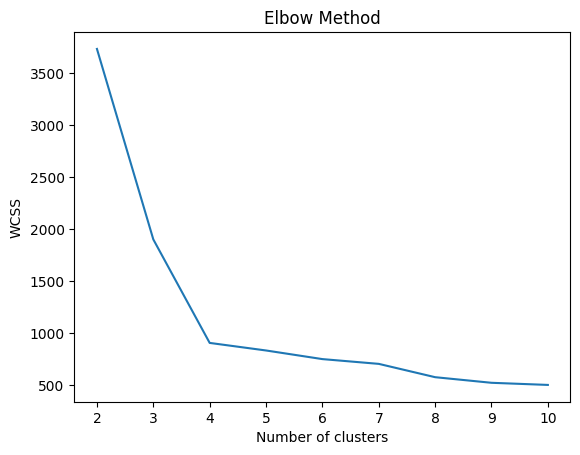

In [16]:
plt.plot(range(2, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
clusterer = KMeans(n_clusters=4,random_state=10)
cluster_labels = clusterer.fit_predict(X)
cluster_labels

array([3, 3, 0, 1, 2, 1, 2, 2, 2, 2, 3, 3, 2, 1, 2, 3, 2, 3, 1, 2, 0, 0,
       2, 1, 2, 2, 1, 1, 0, 2, 3, 1, 2, 3, 2, 3, 0, 0, 3, 0, 2, 0, 1, 2,
       2, 3, 0, 2, 1, 1, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 2,
       3, 2, 0, 0, 3, 0, 2, 3, 2, 2, 3, 2, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 3, 0, 2, 1, 3, 3, 2, 3, 1, 1, 3, 1, 0, 1, 2, 2, 1, 1, 0,
       2, 3, 1, 0, 1, 0, 1, 2, 1, 2, 0, 3, 3, 0, 2, 0, 1, 3, 3, 2, 1, 0,
       0, 0, 0, 3, 1, 2, 1, 1, 2, 3, 2, 1, 1, 1, 2, 2, 3, 3, 0, 0, 1, 3,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 2, 1, 3, 0, 2, 3, 1, 0,
       0, 0, 0, 3, 2, 0, 1, 3, 3, 0, 2, 3, 3, 2, 1, 1, 3, 3, 2, 1, 2, 3,
       3, 1, 3, 0, 1, 2, 2, 3, 2, 0, 3, 2, 0, 2, 0, 3, 2, 2, 2, 1, 0, 1,
       2, 3, 0, 2, 0, 0, 0, 1, 0, 1, 3, 0, 3, 0, 1, 1, 0, 3, 1, 3, 2, 0,
       3, 3, 3, 3, 2, 0, 3, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 0,
       1, 2, 3, 3, 0, 0, 0, 2, 1, 1, 2, 1, 0, 3, 1, 3, 1, 3, 3, 1, 3, 1,
       1, 2, 0, 0, 0, 2, 2, 0, 3, 1, 3, 3, 3, 2, 0,

In [18]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

For n_clusters = 2, the average silhouette score is: 0.7049787496083262
For n_clusters = 3, the average silhouette score is: 0.5882004012129721
For n_clusters = 4, the average silhouette score is: 0.6505186632729437
For n_clusters = 5, the average silhouette score is: 0.561464362648773
For n_clusters = 6, the average silhouette score is: 0.4857596147013469
For n_clusters = 7, the average silhouette score is: 0.49731550839901734
For n_clusters = 8, the average silhouette score is: 0.38073084401226504
For n_clusters = 9, the average silhouette score is: 0.3839537100348846
For n_clusters = 10, the average silhouette score is: 0.3912884245125424
